<a href="https://colab.research.google.com/github/Suryarenuka/fmml2021/blob/main/Lab2_features_FMML2021620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Try it out for yourself and answer:
How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using plt.plot. Check also for extreme values for splits, like 99.9% or 0.1%

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

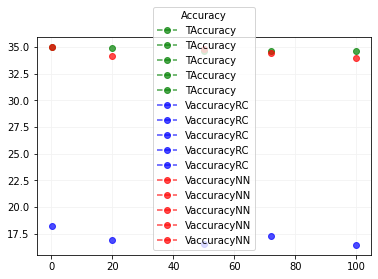

In [2]:
Vdataset=np.array([[20,50,72,99.9,0.1]]) # data is in % 
xlabel="data in %"
a=np.array([[0.34917953667953666,0.3464052287581699,0.3464052287581699,0.3464052287581699,0.34964694424153886]])  #TestAccuracy
TestAccuracy=a*100  # accuracy converted into %
#plt.step(Vdataset,TestAccuracy)
plt.plot(Vdataset,TestAccuracy,'o--', color='Green', alpha=0.7, label='TAccuracy')


b=np.array([[0.1688468992248062,0.16539624924379914,0.172851956434046,0.16440266828380837,0.18181818181818182]])  #VAccuracyRC
VAccuracyRC=b*100
#plt.step(Vdataset,VAccuracyRC, where='mid')
plt.plot(Vdataset,VAccuracyRC,'o--', color='Blue', alpha=0.7,label='VaccuracyRC')

c=np.array([[0.34108527131782945,0.3479862475442043,0.34459128732256483, 0.33997509339975096,0.34964694424153886]])   #VAcuuracyNN
VAcuuracyNN=c*100
#plt.step(Vdataset, VAcuuracyNN, where='post')
plt.plot(Vdataset,VAcuuracyNN, 'o--', color='Red', alpha=0.7,label='VaccuracyNN')

plt.legend(title='Accuracy')
plt.grid( color='0.95')

From the graph it is clear that the accuracy of the validation set does not affect if we increase the percentage of validation set or reduce it as long as we keep test data set constant.

validation set is subset of training set, any change in the amount of samples in the validation set causes no change in training accuracy using Random Classifier or nearest neighbor.

2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?


validation data set should be comparatively smaller than training data set so that we can predict bettertest accuracy .

validation dataset is used to evaluate the performance of the model while tuning the hyperparameters of the model. This is used to select the model before applying on test data based the number of hyperparameters validation set size should vary there could not be a much impact on accuracy of test set.

3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

the train-test-validation split ratio is also quite specific to your use case.

Models with very few hyperparameters will be easy to validate and tune, so you can probably reduce the size of your validation set, but if your model has many hyperparameters, you would want to have a large validation set as well(although you should also consider cross validation).

Multiple splits and cross validation

1.Does averaging the validation accuracy across multiple splits give more consistent results?

2.Does it give more accurate estimate of test accuracy?

3.What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

4.Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

1.Does averaging the validation accuracy across multiple splits give more consistent results?

2.Does it give more accurate estimate of test accuracy?

In both the cases test accuracy is nearly same but cross validation is simple but it is time consuming when dataset is very large.. or when we increase number of iterations.

This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set

3.What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

I have tried with different iterations but there is no change in test accuracy.

As a general rule and empirical evidence, K = 5 or 10 is generally preferred, but nothing’s fixed and it can take any value.

Due to imbalance in the response variables, the mean response value is approximately equal in all the folds. This variation is also known as Stratified K Fold.

4.Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

cross validation perfectly works when dataset is small. When dataset is small removing a part of it for validation poses a problem of underfitting. By reducing the training data, we risk losing important patterns/ trends in data set, which in turn increases error induced by bias.

In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model. As can be seen, every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set.